In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import StratifiedKFold

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:

stratified_kfold = StratifiedKFold(n_splits=5)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []  # To store confusion matrices



In [4]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    lgb_classifier = lgb.LGBMClassifier()

    lgb_classifier.fit(X_train, y_train)
    y_pred = lgb_classifier.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)
    
# Calculate and print the mean and standard deviation of metrics
print("Mean Accuracy =", np.mean(accuracy_scores))
print("Mean Precision =", np.mean(precision_scores))
print("Mean Recall =", np.mean(recall_scores))
print("Mean F1-score =", np.mean(f1_scores))

print("Standard Deviation Accuracy =", np.std(accuracy_scores))
print("Standard Deviation Precision =", np.std(precision_scores))
print("Standard Deviation Recall =", np.std(recall_scores))
print("Standard Deviation F1-score =", np.std(f1_scores))

for i, confusion in enumerate(confusion_matrices):
    print(f'Confusion Matrix for Fold {i + 1}:')
    print(confusion)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.249971
[LightGBM] [Info] Start training from score -1.974552
[LightGBM] [Info] Start training from score -2.496741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [In

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score 1.308824
Feature importance:
abnormal_short_term_variability: 355
percentage_of_time_with_abnormal_long_term_variability: 292
histogram_width: 230
baseline value: 217
histogram_mean: 206
histogram_variance: 172
mean_value_of_short_term_variability: 171
histogram_min: 166
histogram_max: 157
mean_value_of_long_term_variability: 143
histogram_mode: 140
histogram_median: 129
accelerations: 118
uterine_contractions: 111
prolongued_decelerations: 103
fetal_movement: 103
histogram_number_of_peaks: 102
light_decelerations: 56
histogram_tendency: 24
histogram_number_of_zeroes: 5
severe_dece

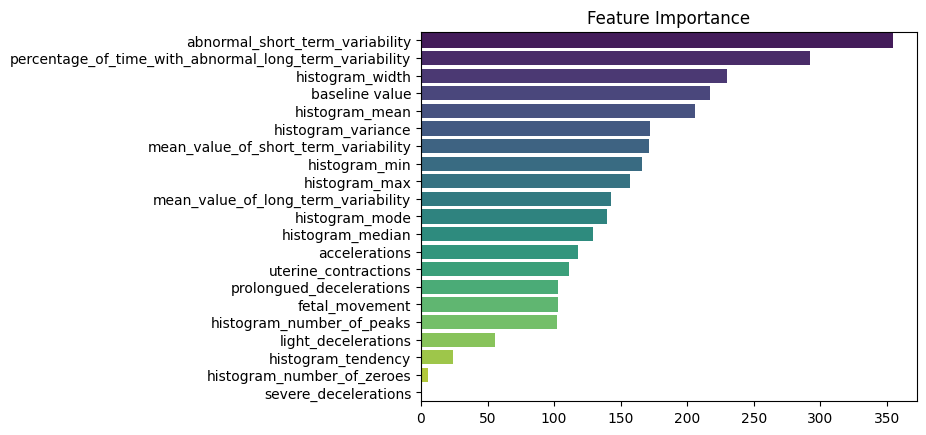

In [5]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("fetal_health.csv")

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set up the parameters for the LightGBM model
params = {
    "objective": "regression",  # or "classification" based on your task
    "metric": "mse",  # or other appropriate metric
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9
}

# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_round)

# Calculate feature importance
feature_importance = bst.feature_importance(importance_type='split')  # or 'gain' for gain-based importance

# Map feature names to their indices
feature_names = X.columns
feature_indices = dict(zip(range(len(feature_names)), feature_names))

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importance
print("Feature importance:")
for idx in sorted_idx:
    print(f"{feature_indices[idx]}: {feature_importance[idx]}")

# Plot feature importance
sns.barplot(x=feature_importance[sorted_idx], y=[feature_indices[idx] for idx in sorted_idx], palette="viridis")
plt.title("Feature Importance")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 170, number of used features: 19
[LightGBM] [Info] Start training from score -1.498212
[LightGBM] [Info] Start training from score -0.356675
[LightGBM] [Info] Start training from score -2.570849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

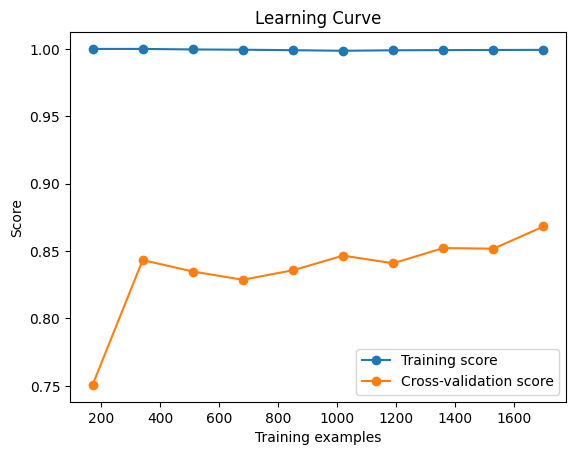

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lgb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()